In [269]:
#importnecessary libraries
import matplotlib.pyplot as plt
import numpy as np
from math import exp
import matplotlib.pyplot as plt

#Defining Trajectory Parameters
number_of_points=200     #No of points to be ploted
ground_pos=0              #ground position
g=9.81
vel_x=100              #velocity in X direction
vel_y=100                   #velocity in Y direction
tlist=[]
xlist=[]
ylist=[]
uncertanity=0              #uncertainity for ball position
t=0.0           
dt=0.2
for i in range(number_of_points):
  x=vel_x*t
  y=vel_y*t-0.5*g*t**2
  tlist.append(t)
  if y>=ground_pos:
    xlist.append(x)
    ylist.append(y)
  t=t+dt
ylist=ylist + np.random.normal(0, uncertanity, len(ylist))

class KalmanFilter(object):
    def __init__(self, Fk = None, Hk = None, Qk = None, Rk = None):
        if(Fk is None or Hk is None):
            raise ValueError("Set proper system dynamics.")        
        self.n = Fk.shape[1]
        self.m = Hk.shape[1]
        self.Fk = Fk                                          #Fk, the state-transition model;
        self.Hk = Hk                                          #Hk, the observation model;
        self.Qk = np.eye(self.n) if Qk is None else Qk        #Qk, the covariance of the process noise;
        self.Rk = np.eye(self.n) if Rk is None else Rk        #Rk, the covariance of the observation noise;
        self.Pk = np.eye(self.n)
        self.x = np.zeros((self.n, 1))

    def predict(self, u = 0):
        self.x = np.dot(self.Fk, self.x) + np.dot(0, u)                   #Predicted (a priori) state estimate
        self.Pk = np.dot(np.dot(self.Fk, self.Pk), self.Fk.T) + self.Qk   #Predicted (a priori) estimate covariance
        return self.x

    def update(self, z):
        y = z - np.dot(self.Hk, self.x)                                    #Pre fit residual
        S = self.Rk + np.dot(self.Hk, np.dot(self.Pk, self.Hk.T))          #Pre fit residual covariance
        K = np.dot(np.dot(self.Pk, self.Hk.T), np.linalg.inv(S))           #Optimal Kalman gain
        self.x = self.x + np.dot(K, y)                                     #Updated (a posteriori) state estimate
        I = np.eye(self.n)                                                 
        self.Pk = np.dot(np.dot(I - np.dot(K, self.Hk), self.Pk),          #Updated (a posteriori) estimate covariance
        	(I - np.dot(K, self.Hk)).T) + np.dot(np.dot(K, self.Rk), K.T)

dt = 2
Fk = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
Hk = np.array([1, 0, 0]).reshape(1, 3)
Qk = np.array([[0.05, 0.05, 0], [0.05, 0.05, 0], [0., 0., 0.]])
Rk = np.array([1]).reshape(1, 1)
 
kf = KalmanFilter(Fk = Fk, Hk = Hk, Qk = Qk, Rk = Rk)
predictions = []
for z in ylist:
	predictions.append(np.dot(Hk,  kf.predict())[0])
	kf.update(z)
predlist=[]
for i in predictions:
  predlist.append(i[0])


In [273]:
#Calculating Accuracy
from sklearn.metrics import mean_squared_error
import math
testscore = math.sqrt(mean_squared_error(ylist, predlist))
print("Root Mean Squarred Error: ",testscore)

Root Mean Squarred Error:  3.644927433461165


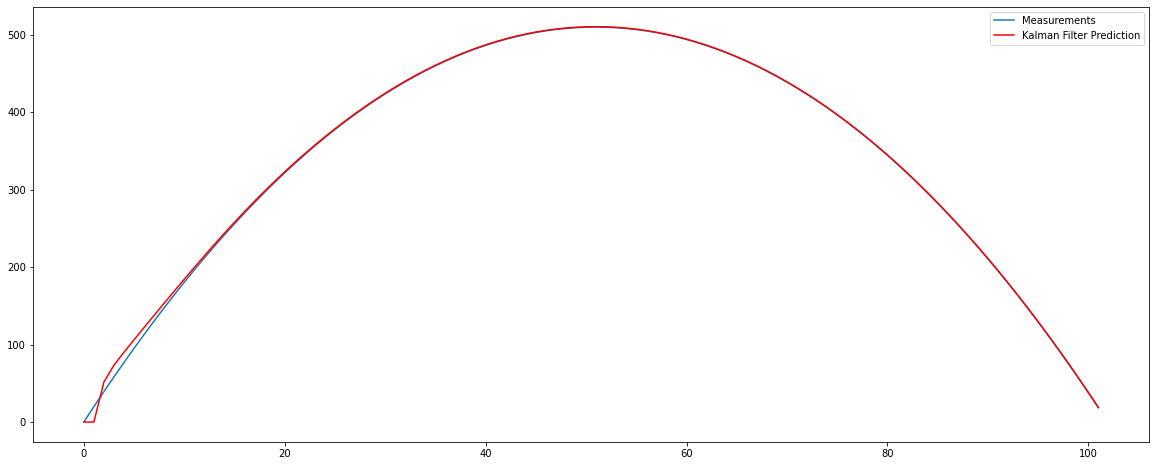

In [271]:
plt.figure(figsize=(20,8))
plt.plot( range(len(ylist)),ylist, label = 'Measurements')
plt.plot( range(len(ylist)),np.array(predlist), label = 'Kalman Filter Prediction',color='red')
plt.legend()
plt.show()